1) Implementing the Stanford model for RRAM's

In [ ]:
# Importing required Libraries
import numpy as np
import matplotlib.pyplot as plt

# Parameters [Vary Ea (1-1.4), V0 (0.2-0.8), gamma (16-25), Rth (1e6-1e7)]
k = 1.38e-23    # Boltzmann constant
q = 1.6e-19     # Electronic change
dt = 0.001      # Time step
ve0 = 7e7       # Attempt-to-escape frequency
I0 = 0.65e-4    # Model parameter in the Stanford current equation
Ea = 1.2 * q    # Activation energy of ionic hopping
g0 = 0.2e-9
a = 0.3e-10     # Hopping distance
V0 = 0.8
gamma = 22.5
Rth = 1e7
g_min = 0.5e-9  # Minimum gap
g_max = 3e-9    # Maximum gap
Icc = 10e-6     # Current compliance for the Set operation
L = 8e-9        # Dielectric thickness
T_amb = 300     # Ambient Temperature

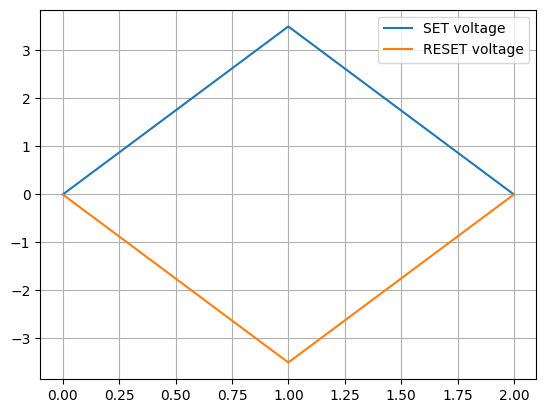

In [ ]:
# Generating the voltage arrays
Vpeak = 3.5
tmax = 2
t = np.arange(0, tmax, dt)
set_vrange = np.zeros_like(t)

time_inst = 0

# For SET process
for time in t:
   if time <= tmax/2:
      set_vrange[time_inst] = (Vpeak/(tmax/2))*time
   else:
      set_vrange[time_inst] = Vpeak - (Vpeak/(tmax/2))*(time - (tmax/2))
   time_inst += 1

# For RESET process
reset_vrange = (-1) * set_vrange

plt.plot(t, set_vrange, label='SET voltage')
plt.plot(t, reset_vrange, label='RESET voltage')
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Variables with their initial values
T = np.zeros(len(t)-1)
I = np.zeros(len(t)-1)
g = np.zeros_like(t)
g[0] = g_min
T[0] = T_amb

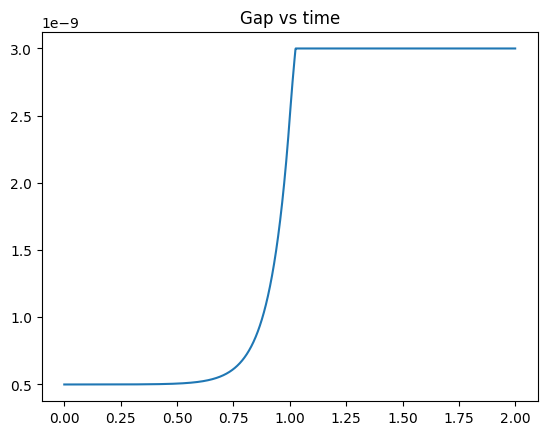

In [ ]:
# Part A : Gap increases from g_min to g_max

i = 0   # For indexing

# Updating Gap value; Temperature = constant
for V in set_vrange[:-1]:
    I[i] = I0*np.exp(-g[i]/g0)*np.sinh(V/V0)
    g[i+1] = g[i] + dt*(ve0*np.exp(-Ea/(k*T_amb))*np.sinh(q*a*gamma*V/(L*k*T_amb)))
    if g[i+1] > g_max:
        g[i+1] = g_max
    if g[i+1] < g_min:
        g[i+1] = g_min
    i += 1

plt.plot(t, g)
plt.title("Gap vs time")
plt.show()

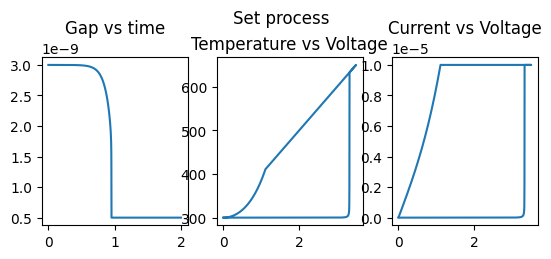

In [ ]:
# Part B : SET Process

i = 0   # For indexing

g[0] = g_max
# Updating Gap and Temperature values
for V in set_vrange[:-1]:
    I[i] = I0*np.exp(-g[i]/g0)*np.sinh(V/V0)
    if I[i] > Icc:
      I[i] = Icc
    T[i] = T_amb + V*I[i]*Rth
    g[i+1] = g[i] - dt*(ve0*np.exp(-Ea/(k*T[i]))*np.sinh(q*a*gamma*V/(L*k*T[i])))
    if g[i+1] > g_max:
        g[i+1] = g_max
    if g[i+1] < g_min:
        g[i+1] = g_min
    i += 1

plt.subplot(2, 3, 1)
plt.plot(t, g)
plt.title("Gap vs time")

plt.subplot(2, 3, 2)
plt.plot(set_vrange[:-1], T)
plt.title("Temperature vs Voltage")

plt.subplot(2, 3, 3)
plt.plot(set_vrange[:-1], I)
plt.title("Current vs Voltage")

plt.suptitle("Set process")
plt.show()

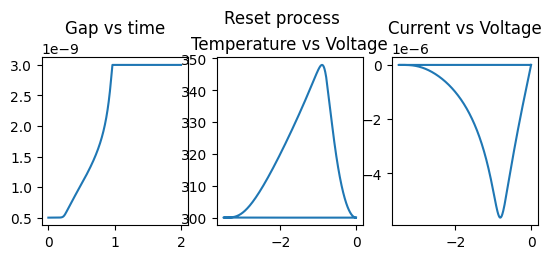

In [ ]:
# Part C : RESET Process

i = 0   # For indexing

g[0] = g_min
# Updating Gap and Temperature values
for V in reset_vrange[:-1]:
    I[i] = I0*np.exp(-g[i]/g0)*np.sinh(V/V0)
    if I[i] > Icc:
      I[i] = Icc
    T[i] = T_amb + V*I[i]*Rth
    g[i+1] = g[i] - dt*(ve0*np.exp(-Ea/(k*T[i]))*np.sinh(q*a*gamma*V/(L*k*T[i])))
    if g[i+1] > g_max:
        g[i+1] = g_max
    if g[i+1] < g_min:
        g[i+1] = g_min
    i += 1

plt.subplot(2, 3, 1)
plt.plot(t, g)
plt.title("Gap vs time")

plt.subplot(2, 3, 2)
plt.plot(reset_vrange[:-1], T)
plt.title("Temperature vs Voltage")

plt.subplot(2, 3, 3)
plt.plot(reset_vrange[:-1], I)
plt.title("Current vs Voltage")

plt.suptitle("Reset process")
plt.show()

I-V Semilog plot

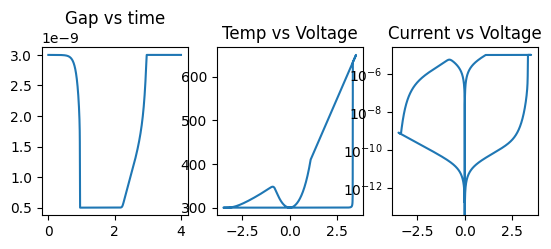

In [ ]:
vol = np.concatenate((set_vrange, reset_vrange))
i = 0   # For indexing

t2 = np.arange(0, 2*tmax, dt)
T2 = np.zeros(len(t2)-1)
I2 = np.zeros(len(t2)-1)
g2 = np.zeros_like(t2)

g2[0] = g_max
T2[0] = T_amb

# Updating Gap and Temperature values
for V in vol[:-1]:
    I2[i] = I0*np.exp(-g2[i]/g0)*np.sinh(V/V0)
    if I2[i] > Icc:
      I2[i] = Icc
    T2[i] = T_amb + V*I2[i]*Rth
    g2[i+1] = g2[i] - dt*(ve0*np.exp(-Ea/(k*T2[i]))*np.sinh(q*a*gamma*V/(L*k*T2[i])))
    if g2[i+1] > g_max:
        g2[i+1] = g_max
    if g2[i+1] < g_min:
        g2[i+1] = g_min
    i += 1

plt.subplot(2, 3, 1)
plt.plot(t2, g2)
plt.title("Gap vs time")

plt.subplot(2, 3, 2)
#plt.plot(vol[:-1], I2)
plt.title("Current vs Voltage")

plt.subplot(2, 3, 2)
plt.plot(vol[:-1], T2)
plt.title("Temp vs Voltage")

plt.subplot(2, 3, 3)
plt.semilogy(vol[:-1], abs(I2))
plt.title("Current vs Voltage")

plt.show()

2) Programming the RRAM cell using an input voltage pulse

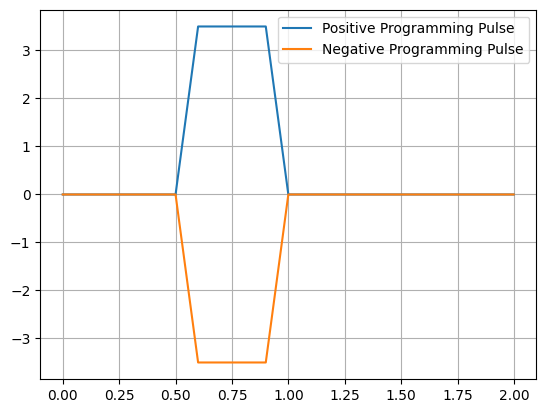

In [ ]:
# Generating the programming input voltage pulses (Trapeziums)

Vpulse_peak = 4
tpulse_max = 2
t = np.arange(0, tmax, dt)
pos_pulse = np.zeros_like(t)

pulse_start = 0.5
pulse_const = 0.3
pulse_duration = 0.5

time_inst = 0

# Positive Programming Pulse
for time in t:
   if time >= pulse_start and time<= pulse_start + (pulse_duration-pulse_const)/2:
      pos_pulse[time_inst] = (Vpeak/((pulse_duration-pulse_const)/2))*(time - pulse_start)
   elif time >= pulse_start + (pulse_duration-pulse_const)/2 and time<=pulse_start + (pulse_duration+pulse_const)/2:
      pos_pulse[time_inst] = Vpeak
   elif time >= pulse_start + (pulse_duration+pulse_const)/2 and time<=pulse_start+pulse_duration:
      pos_pulse[time_inst] = Vpeak - (Vpeak/((pulse_duration-pulse_const)/2))*(time - (pulse_start + (pulse_duration+pulse_const)/2))
   time_inst += 1

# Negative Programming Pulse
neg_pulse = (-1) * pos_pulse

plt.plot(t, pos_pulse, label='Positive Programming Pulse')
plt.plot(t, neg_pulse, label='Negative Programming Pulse')
plt.legend()
plt.grid()
plt.show()

<ipython-input-10-dc0b022ddf84>:18: RuntimeWarning: invalid value encountered in double_scalars
  G[i] = I[i]/V


Initial Conductance = 2.815205202378225e-11
Final Conductance = 3.5714285714285726e-06


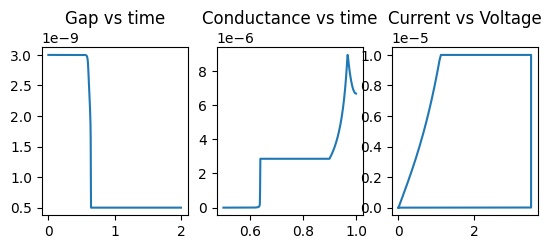

In [ ]:
i = 0   # For indexing

# Defining Conductance (G = I/V) array
G = np.zeros(len(t)-1)

g[0] = g_max
# Updating Gap and Temperature values
for V in pos_pulse[:-1]:
    I[i] = I0*np.exp(-g[i]/g0)*np.sinh(V/V0)
    if I[i] > Icc:
      I[i] = Icc
    T[i] = T_amb + V*I[i]*Rth
    g[i+1] = g[i] - dt*(ve0*np.exp(-Ea/(k*T[i]))*np.sinh(q*a*gamma*V/(L*k*T[i])))
    if g[i+1] > g_max:
        g[i+1] = g_max
    if g[i+1] < g_min:
        g[i+1] = g_min
    G[i] = I[i]/V
    i += 1

print("Initial Conductance = " + str(G[520]))
print("Final Conductance = " + str(G[920]))

plt.subplot(2, 3, 1)
plt.plot(t, g)
plt.title("Gap vs time")

plt.subplot(2, 3, 2)
plt.plot(t[:-1], G)
plt.title("Conductance vs time")

plt.subplot(2, 3, 3)
plt.plot(pos_pulse[:-1], I)
plt.title("Current vs Voltage")

plt.show()

<ipython-input-11-48c8286c2a84>:18: RuntimeWarning: invalid value encountered in double_scalars
  G[i] = I[i]/V


Initial Conductance = 7.537643265095428e-06
Final Conductance = 1.1747422315767277e-10


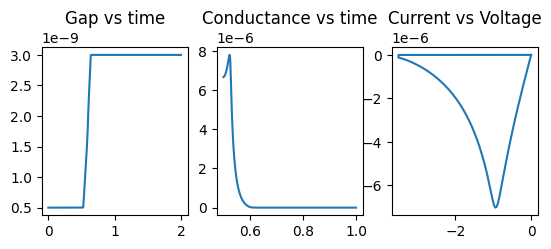

In [ ]:
i = 0   # For indexing

# Defining Conductance (G = I/V) array
G = np.zeros(len(t)-1)

g[0] = g_min
# Updating Gap and Temperature values
for V in neg_pulse[:-1]:
    I[i] = I0*np.exp(-g[i]/g0)*np.sinh(V/V0)
    if I[i] > Icc:
      I[i] = Icc
    T[i] = T_amb + V*I[i]*Rth
    g[i+1] = g[i] - dt*(ve0*np.exp(-Ea/(k*T[i]))*np.sinh(q*a*gamma*V/(L*k*T[i])))
    if g[i+1] > g_max:
        g[i+1] = g_max
    if g[i+1] < g_min:
        g[i+1] = g_min
    G[i] = I[i]/V
    i += 1

print("Initial Conductance = " + str(G[520]))
print("Final Conductance = " + str(G[920]))

plt.subplot(2, 3, 1)
plt.plot(t, g)
plt.title("Gap vs time")

plt.subplot(2, 3, 2)
plt.plot(t[:-1], G)
plt.title("Conductance vs time")

plt.subplot(2, 3, 3)
plt.plot(neg_pulse[:-1], I)
plt.title("Current vs Voltage")

plt.show()